# Training NN: case study of a CSV file


## Tips and tricks of model building

- Differences between feature-based approaches and neural networks!
- The power of cross-validation
- Importance of scaling


## Use (almost exclusively) CoPilot to generate code

### Prompts to Claude are above every code cell


CP: load data data/DATA_1.csv into a dataframe, delimiter ;, coma separates decimal digits

In [1]:
import pandas as pd

# Load the data into a dataframe
df = pd.read_csv('data/DATA_1.csv', delimiter=';', decimal=',')
print(df)

      mat  no  lpow  lspeed  dist  vol  thick       sken   shap angle     Ra  \
0   FeSi3   1   255     653  0.09  108   0.04  Stripe 10  Kvádr   90°  17.32   
1     NaN   2   255     633  0.09  112   0.04  Stripe 10  Kvádr   90°  22.22   
2     NaN   3   255     643  0.09  110   0.04  Stripe 10  Kvádr   90°  23.57   
3     NaN   4   245     643  0.09  106   0.04  Stripe 10  Kvádr   90°  21.34   
4     NaN   5   265     643  0.09  114   0.04  Stripe 10  Kvádr   90°  18.80   
5     NaN   6   255     644  0.09  110   0.04  Stripe 10  Kvádr   90°  18.73   
6     NaN   7   230     750  0.08   96   0.04  Stripe 10  Kvádr   90°  11.94   
7     NaN   8   270     760  0.08  111   0.04  Stripe 10  Kvádr   90°  11.23   
8     NaN   9   270     740  0.08  114   0.04  Stripe 10  Kvádr   90°  11.14   
9     NaN  10   270     750  0.08  113   0.04  Stripe 10  Kvádr   90°  12.15   
10    NaN  11   260     750  0.08  108   0.04  Stripe 10  Kvádr   90°  14.70   
11    NaN  12   280     750  0.08  117  

create vector of outputs y from column Ra and vectror of regressors X from colums lpow,lspeed,dist,vol

In [2]:
# Create vector of outputs y
y = df['Ra'].values

# Create matrix of regressors X
X = df[['lpow', 'lspeed', 'dist', 'vol']].values
X_orig = df[['lpow', 'lspeed', 'dist', 'vol']]


print("Vector of outputs y:", y)
print("Matrix of regressors X:", X)

Vector of outputs y: [17.32 22.22 23.57 21.34 18.8  18.73 11.94 11.23 11.14 12.15 14.7  10.53
 21.94 15.95 11.4  12.06 10.5  14.29  8.91 10.16  9.07 15.01 14.96 15.48
  9.01  9.85  9.09  9.43  9.57  6.95  8.44  8.17  9.04  8.9   7.96  8.99]
Matrix of regressors X: [[2.55e+02 6.53e+02 9.00e-02 1.08e+02]
 [2.55e+02 6.33e+02 9.00e-02 1.12e+02]
 [2.55e+02 6.43e+02 9.00e-02 1.10e+02]
 [2.45e+02 6.43e+02 9.00e-02 1.06e+02]
 [2.65e+02 6.43e+02 9.00e-02 1.14e+02]
 [2.55e+02 6.44e+02 9.00e-02 1.10e+02]
 [2.30e+02 7.50e+02 8.00e-02 9.60e+01]
 [2.70e+02 7.60e+02 8.00e-02 1.11e+02]
 [2.70e+02 7.40e+02 8.00e-02 1.14e+02]
 [2.70e+02 7.50e+02 8.00e-02 1.13e+02]
 [2.60e+02 7.50e+02 8.00e-02 1.08e+02]
 [2.80e+02 7.50e+02 8.00e-02 1.17e+02]
 [2.04e+02 9.28e+02 1.00e-01 5.50e+01]
 [2.24e+02 9.28e+02 1.00e-01 6.00e+01]
 [2.20e+02 7.60e+02 8.00e-02 9.00e+01]
 [2.20e+02 7.40e+02 8.00e-02 9.30e+01]
 [2.20e+02 7.50e+02 8.00e-02 9.20e+01]
 [2.10e+02 7.50e+02 8.00e-02 8.80e+01]
 [2.85e+02 6.00e+02 1.00e-01 1.19

CP: fit linear regression model y=X theta and report statistics of the quality of the fit such as confidence intervals 

In [3]:
import statsmodels.api as sm

# Add a constant to the matrix of regressors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     5.044
Date:                Tue, 10 Dec 2024   Prob (F-statistic):            0.00300
Time:                        22:35:06   Log-Likelihood:                -96.501
No. Observations:                  36   AIC:                             203.0
Df Residuals:                      31   BIC:                             210.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8085     51.412      0.619      0.5

show eigenvales of X'X

In [4]:
import numpy as np

# Compute X'X
XtX = np.dot(X.T, X)

# Compute the eigenvalues of X'X
eigenvalues = np.linalg.eigvals(XtX)

print("Eigenvalues of X'X:")
print(eigenvalues)

Eigenvalues of X'X:
[2.35003228e+07 1.34597882e+05 6.88555970e+03 4.87285303e-02
 2.91409453e-04]


transform the input by standard scaler

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the input data
X_scaled = scaler.fit_transform(X)

print("Scaled input data:")
print(X_scaled)

Scaled input data:
[[ 0.00000000e+00 -3.34036159e-01 -9.62002434e-01 -3.19438282e-01
   4.69212305e-01]
 [ 0.00000000e+00 -3.34036159e-01 -1.16041027e+00 -3.19438282e-01
   6.79046380e-01]
 [ 0.00000000e+00 -3.34036159e-01 -1.06120635e+00 -3.19438282e-01
   5.74129343e-01]
 [ 0.00000000e+00 -5.76971547e-01 -1.06120635e+00 -3.19438282e-01
   3.64295268e-01]
 [ 0.00000000e+00 -9.11007706e-02 -1.06120635e+00 -3.19438282e-01
   7.83963417e-01]
 [ 0.00000000e+00 -3.34036159e-01 -1.05128596e+00 -3.19438282e-01
   5.74129343e-01]
 [ 0.00000000e+00 -9.41374629e-01  2.75566438e-04 -1.46941610e+00
  -1.60289918e-01]
 [ 0.00000000e+00  3.03669235e-02  9.94794840e-02 -1.46941610e+00
   6.26587861e-01]
 [ 0.00000000e+00  3.03669235e-02 -9.89283511e-02 -1.46941610e+00
   7.83963417e-01]
 [ 0.00000000e+00  3.03669235e-02  2.75566438e-04 -1.46941610e+00
   7.31504898e-01]
 [ 0.00000000e+00 -2.12568465e-01  2.75566438e-04 -1.46941610e+00
   4.69212305e-01]
 [ 0.00000000e+00  2.73302312e-01  2.75566438e

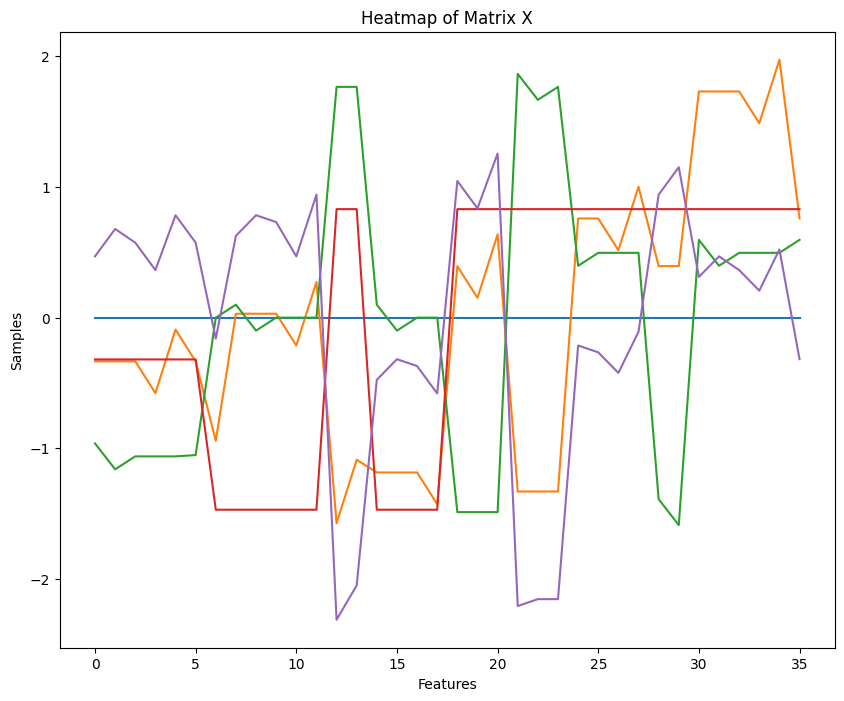

In [6]:

import matplotlib.pyplot as plt

# Create a heatmap of the matrix X
plt.figure(figsize=(10, 8))
plt.plot(X_scaled)
plt.title("Heatmap of Matrix X")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

replace to first column of Xscaled by ones

In [7]:
# Replace the first column of X with ones
X_scaled[:, 0] = 1


fit ols to the scaled data

In [8]:
# Fit the linear regression model to the scaled data
model_scaled = sm.OLS(y, X_scaled).fit()

# Print the summary of the model
print(model_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     5.044
Date:                Tue, 10 Dec 2024   Prob (F-statistic):            0.00300
Time:                        22:35:06   Log-Likelihood:                -96.501
No. Observations:                  36   AIC:                             203.0
Df Residuals:                      31   BIC:                             210.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7444      0.634     20.094      0.0

In [9]:
XtX = np.dot(X_scaled.T, X_scaled)

# Compute the eigenvalues of X'X
eigenvalues = np.linalg.eigvals(XtX)

print("Eigenvalues of X'X:")
print(eigenvalues)

Eigenvalues of X'X:
[36.         76.14402226 51.15002827 16.42204183  0.28390764]


Plot scatterplot of the y and y predicted by the linear model

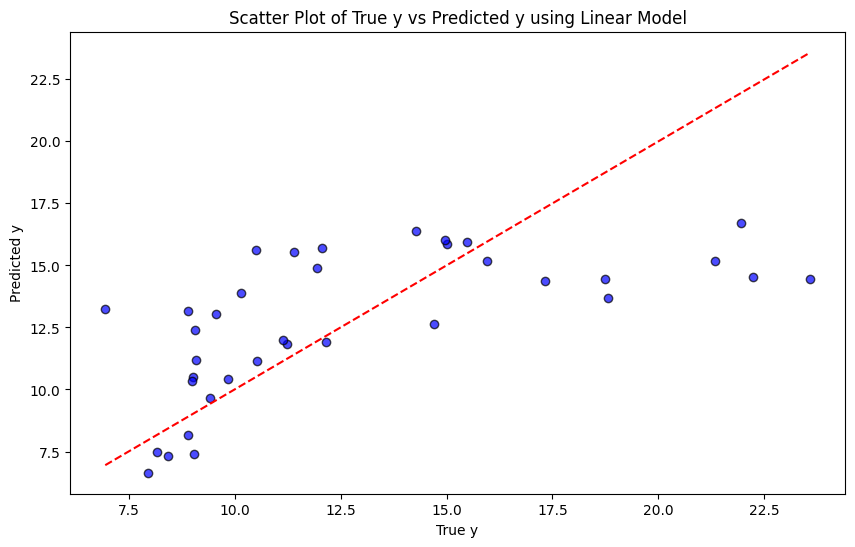

In [10]:
# Predict y using the linear model
y_pred = model.predict(X)

# Plot the scatter plot of true y and predicted y
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Scatter Plot of True y vs Predicted y using Linear Model')
plt.show()

## Feature engineering
- linear regression can be used for any input vectors X
- we can add any transformation of the data to the regression
```math
y = a*lpow + a2*lpow^2 + a3*log(lpow)...
```
- these transformations are known as "features"
- finding the right transformation is the art of *feature engineering*

Fit polynomial regression of order 2 to the scaled data

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features of order 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_orig.values)

# Fit the linear regression model to the polynomial features
model_poly = sm.OLS(y, X_poly).fit()

# Print the summary of the model
print(model_poly.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              151.4
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                    1.57e-18
Time:                        22:35:07   Log-Likelihood:                         -62.440
No. Observations:                  36   AIC:                                      152.9
Df Residuals:                      22   BIC:                                      175.0
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Run a feature selection method on the polynomial regression

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lr = LinearRegression()

# Initialize RFE with the linear regression model and the number of features to select
rfe = RFE(estimator=lr, n_features_to_select=5)

# Fit RFE
rfe.fit(X_poly, y)

# Get the ranking of the features
ranking = rfe.ranking_

print("Feature ranking:")
print(ranking)

Feature ranking:
[ 2  4  1  1  5  7  1  6 10  3  9  1  1  8]


fit model with the 5 best features

In [33]:
# Get the indices of the 5 best features
best_5_features_indices = np.where(ranking <5)[0]

# Extract the best features from X_poly
X_best_5_features = X_poly[:, best_5_features_indices]

# Fit the linear regression model with the 5 best features
model_best_5_features = sm.OLS(y, X_best_5_features).fit()

# Print the summary of the model
print(model_best_5_features.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              273.4
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                    1.74e-24
Time:                        22:39:17   Log-Likelihood:                         -66.176
No. Observations:                  36   AIC:                                      148.4
Df Residuals:                      28   BIC:                                      161.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

can I figure out what are these features in the naming of the original columns?

In [34]:
# Get the feature names for the polynomial features
feature_names = poly.get_feature_names_out(X_orig.columns)

# Get the names of the best features
best_feature_names = feature_names[best_5_features_indices]

print("Names of the best features:")
print(best_feature_names)

Names of the best features:
['lpow' 'lspeed' 'dist' 'vol' 'lpow dist' 'lspeed dist' 'dist^2'
 'dist vol']


plot scatter plot of the true y and predicted y using model_best_5_features, print R2 of y and y predicted

R2 score: 0.8876383840029487


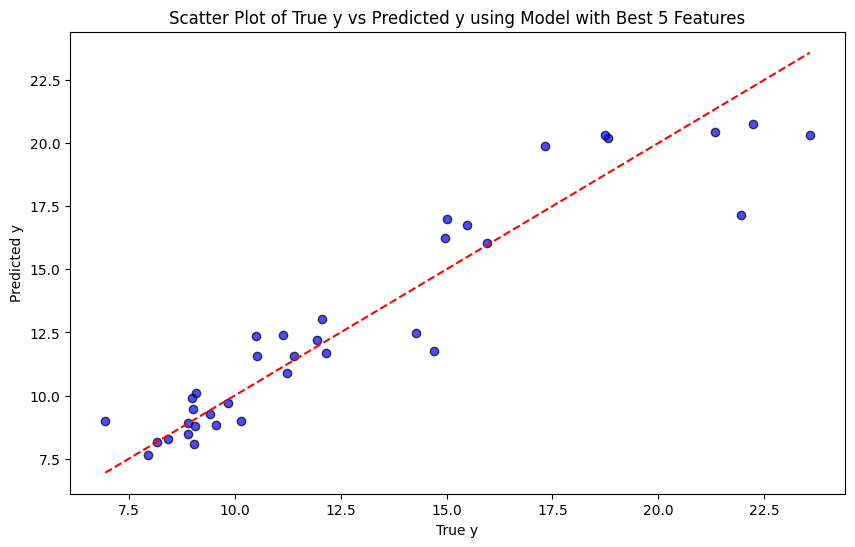

In [35]:
from sklearn.metrics import r2_score

# Predict y using the model with the best 5 features
y_pred_best_5 = model_best_5_features.predict(X_best_5_features)

# Calculate R2 score
r2 = r2_score(y, y_pred_best_5)
print("R2 score:", r2)

# Plot the scatter plot of true y and predicted y
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_best_5, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Scatter Plot of True y vs Predicted y using Model with Best 5 Features')
plt.show()

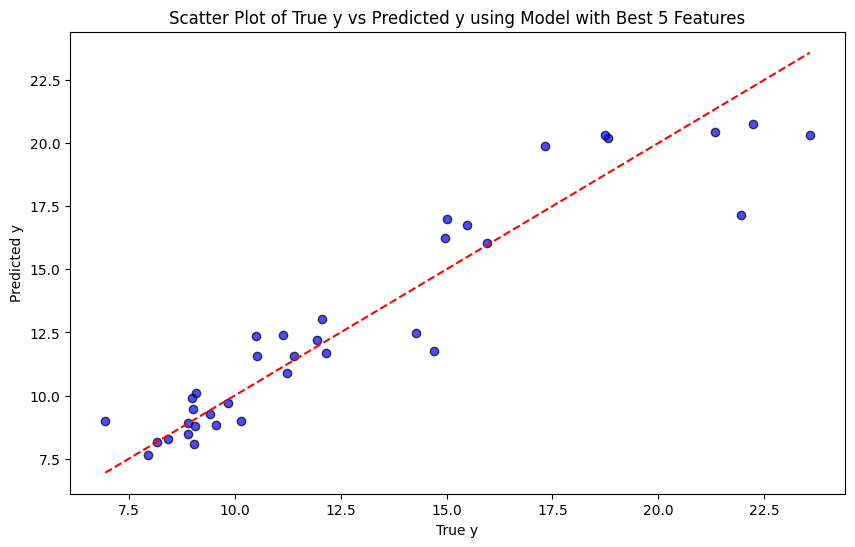

In [36]:
# Predict y using the model with the best 5 features
y_pred_best_5 = model_best_5_features.predict(X_best_5_features)

# Plot the scatter plot of true y and predicted y
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_best_5, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Scatter Plot of True y vs Predicted y using Model with Best 5 Features')
plt.show()

Can I visualize the residue as a function of the multivariate input? e.g. colorcoded pairplot (matrix of 2d scatter plots in each i,j cell)

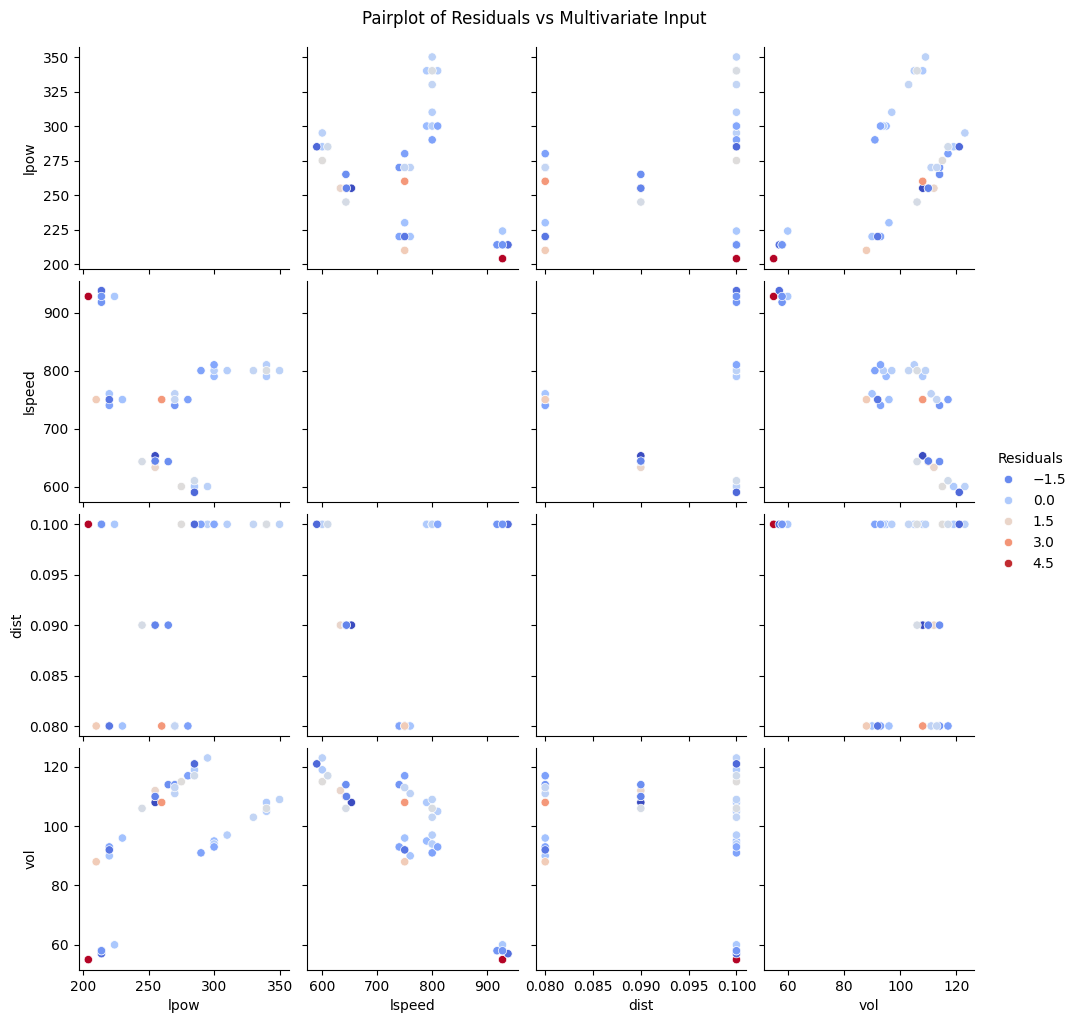

In [37]:
import seaborn as sns

# Calculate residuals
residuals = y - y_pred_best_5

# Create a DataFrame with the residuals and the original features
residuals_df = X_orig.copy()
residuals_df['Residuals'] = residuals

# Create a pairplot with the residuals color-coded
sns.pairplot(residuals_df, hue='Residuals', palette='coolwarm')
plt.suptitle('Pairplot of Residuals vs Multivariate Input', y=1.02)
plt.show()

Split the data into 80% of the training, and the rest for test. Fit the selected model to the train data and predict the test data. Show scatterplot of y, y_predicted for train data in blue and test data in red.

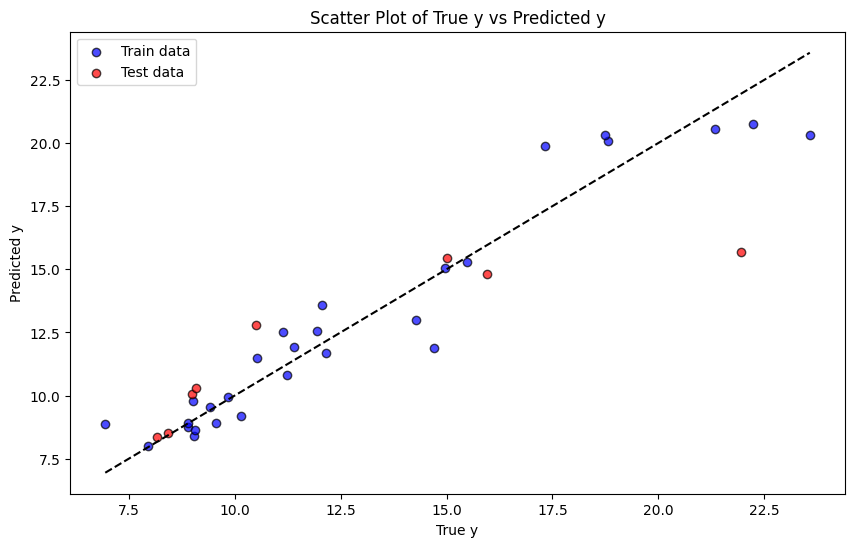

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_best_5_features, y, test_size=0.2, random_state=42)

# Fit the linear regression model to the training data
model_train = sm.OLS(y_train, X_train).fit()

# Predict the test data
y_train_pred = model_train.predict(X_train)
y_test_pred = model_train.predict(X_test)

# Plot the scatter plot of y and y_predicted for train data in blue and test data in red
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', edgecolor='k', alpha=0.7, label='Train data')
plt.scatter(y_test, y_test_pred, color='red', edgecolor='k', alpha=0.7, label='Test data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Scatter Plot of True y vs Predicted y')
plt.legend()
plt.show()

repeat the train/test traiing  10 times and print average train error and average test error

In [39]:
from sklearn.metrics import mean_squared_error

# Initialize lists to store train and test errors
train_errors = []
test_errors = []

# Repeat the train/test training 10 times
for _ in range(1000):
    # Split the data into 80% training and 20% test
    X_train, X_test, y_train, y_test = train_test_split(X_best_5_features, y, test_size=0.2, random_state=None)
    
    # Fit the linear regression model to the training data
    model_train = sm.OLS(y_train, X_train).fit()
    
    # Predict the train and test data
    y_train_pred = model_train.predict(X_train)
    y_test_pred = model_train.predict(X_test)
    
    # Calculate the mean squared error for train and test data
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Calculate the average train and test errors
avg_train_error = np.mean(train_errors)
avg_test_error = np.mean(test_errors)

print("Average train error:", avg_train_error)
print("Average test error:", avg_test_error)

Average train error: 2.1327653604573396
Average test error: 4.14318102102728


## Summary: 
- the gap between trian and test erorr indicates that the model is overfitting the training data
- Perhaps a model with less features may be more relevant for the data.

repeat teh previous code with y scaled using standard scaler

In [40]:
# Initialize the StandardScaler for y
scaler_y = StandardScaler()

# Fit and transform y
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Initialize lists to store train and test errors
train_errors_scaled = []
test_errors_scaled = []

# Repeat the train/test training 10 times
for _ in range(10):
    # Split the data into 80% training and 20% test
    X_train, X_test, y_train, y_test = train_test_split(X_best_5_features, y_scaled, test_size=0.2, random_state=None)
    
    # Fit the linear regression model to the training data
    model_train_scaled = sm.OLS(y_train, X_train).fit()
    
    # Predict the train and test data
    y_train_pred = model_train_scaled.predict(X_train)
    y_test_pred = model_train_scaled.predict(X_test)
    
    # Calculate the mean squared error for train and test data
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Append the errors to the lists
    train_errors_scaled.append(train_error)
    test_errors_scaled.append(test_error)

# Calculate the average train and test errors
avg_train_error_scaled = np.mean(train_errors_scaled)
avg_test_error_scaled = np.mean(test_errors_scaled)

print("Average train error (scaled y):", avg_train_error_scaled)
print("Average test error (scaled y):", avg_test_error_scaled)

Average train error (scaled y): 0.09855727730810579
Average test error (scaled y): 0.21907497910913554


## The quest for good features may be automated: *symbolic regression*
can I run some symbolic regression to find the basis function

In [41]:
from gplearn.genetic import SymbolicRegressor

# Initialize the symbolic regressor
est_gp = SymbolicRegressor(population_size=5000,
                           generations=5, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)

# Fit the symbolic regressor to the data
est_gp.fit(X, y)

# Print the resulting symbolic expression
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    29.43      2.24056e+27        7          3.11261          4.76016     21.70s
   1    15.59      1.10277e+06       11          2.50698          7.16069     17.45s
   2    16.32      4.56473e+08        9          2.51848           9.4356     12.03s
   3     8.43      8.34208e+06        3          2.40674          10.3644      6.09s
   4     5.42      5.99173e+06        3           2.5058          9.57194      0.00s
div(X0, X3)


- Looks like division by a feature may be a good candidate!
- TODO:
    - add reciprocal values of the features to the original list,
    - create products of all features
    - run feature selection